In [1]:
import hepi
import smpl
import numpy as np
import hepi.madgraph as mg
import matplotlib.pyplot as plt
import hepi.resummino as rs
import time
params = ["mg.in",
          "param_card_nlo.dat",
          "mastercode_no_gm2.in",
          "mastercode_with_gm2.in",
          "VANILLA_param_card.dat"]
model_path="/opt/MG5_aMC_v2_7_0/models/EWKino_NLO_UFO_py3"
#model_path="/opt/MG5_aMC_v2_7_0/models/MSSMatNLO_UFO"
mg.set_path("/opt/MG5_aMC_v2_7_0/")
print (mg.get_path())
rs.set_path("~/git/resummino_ug_to_UX_vNLO/")
print (rs.get_path())
ps = [(1000011,-1000011)]

/opt/MG5_aMC_v2_7_0/
~/git/resummino_ug_to_UX_vNLO/


# LO comparison

## Scale

Running: 16 jobs


skipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskip./output/de9e99c954bae395b3b533d556bf40985143476203d1d80bfb002af5854d3cfd.out


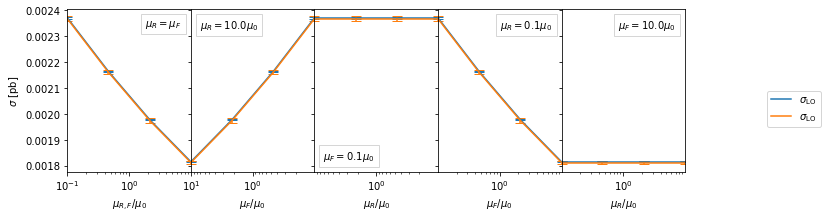

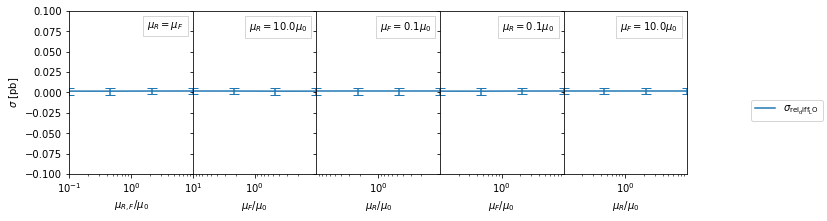

Running: 16 jobs
skipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskip./output/647f7b35569d359468592745e8f903f30ec0ddab08c5016c04b5c1aed64ac71d.out


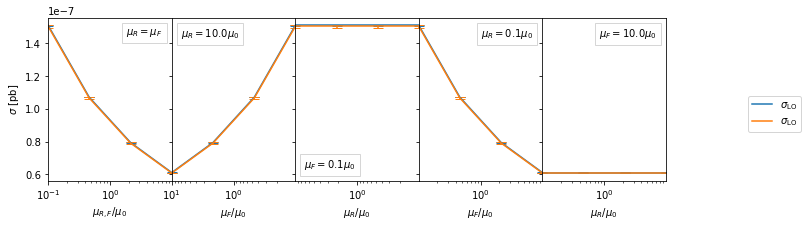

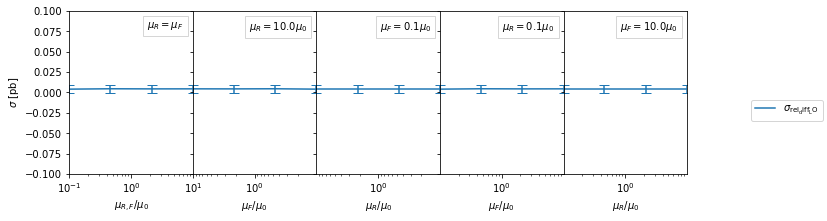

Running: 16 jobs
skipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskip./output/1afad49553bd9a430e460c33b72aabbcb8055a4ffa6bda491ff6260402b432b7.out


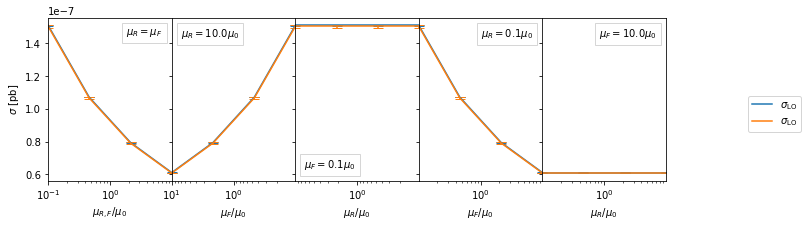

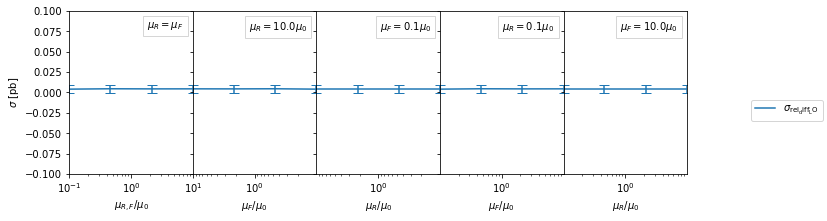

Running: 16 jobs
skipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskip./output/6d5fdd14dc30f90c210c3673233bc7dbff6208b85c74a5936438d7fff79ca517.out


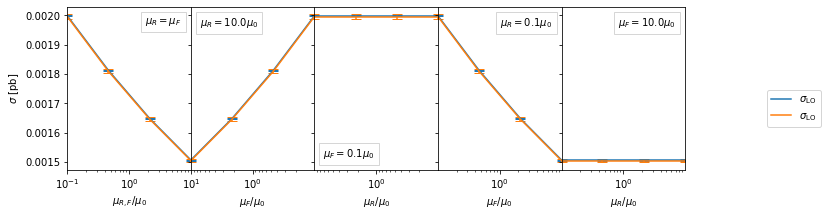

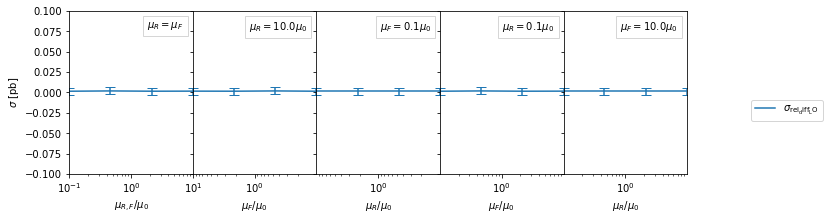

Running: 16 jobs


skipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskip./output/737419fa4e20b3334aadbaff57dff4ac763e15571e7500cc1659bd72d4c22f36.out


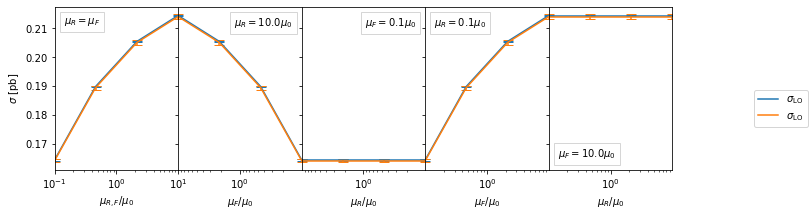

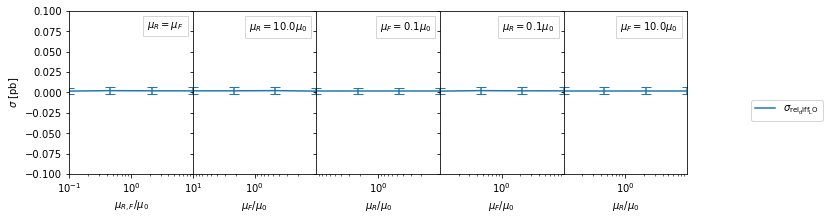

In [2]:
for pa,pb in ps:
    for param in params:
        i = hepi.Input(hepi.Order.LO,13000,pa,pb,param,"CT14lo","CT14lo",1., 1.,model_path=model_path)
        li = [i]
        li = hepi.scan(li,"mu_f",np.around(np.logspace(-1, 1, 4),2))
        li = hepi.scan(li,"mu_r",np.around(np.logspace(-1, 1, 4),2))
        rs_dl = rs.run(li,True,False)
        mg_dl = mg.run(li,False,False)
        rs_dl['rel_diff_LO'] = (rs_dl["LO"]-mg_dl["LO"])/rs_dl["LO"]
        hepi.scale_plot(rs_dl,["LO"],cont=False)
        hepi.scale_plot(mg_dl,["LO"],cont=True)
        smpl.plot.show()
        hepi.scale_plot(rs_dl,["rel_diff_LO"],cont=False)
        plt.ylim([-0.1,0.1])
        smpl.plot.show()

## Mass

Running: 16 jobs


skipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskip./output/7f7fc8c8d332ff2b2e4ea1638843ccfbdeb4d602d522cba0f333aed6f81a6ab2.out
computed AUC using sklearn.metrics.auc: 0.001952055109280725
computed AUC using sklearn.metrics.auc: 0.0019462224875838117


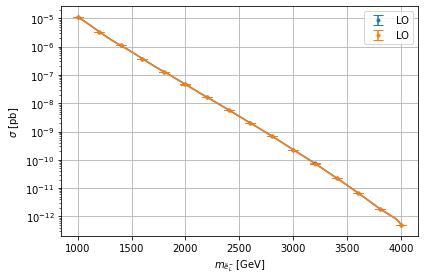

computed AUC using sklearn.metrics.auc: 13.824696661230316


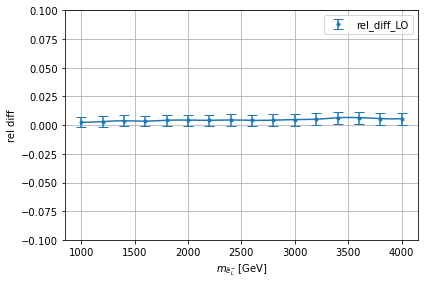

Running: 16 jobs
skipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskip./output/da682372803cf626ac9868a60da47c160aff490be82c36f10a4e2c16dc4dbb6e.out
computed AUC using sklearn.metrics.auc: 0.001952265661531226
computed AUC using sklearn.metrics.auc: 0.0019466431768724573


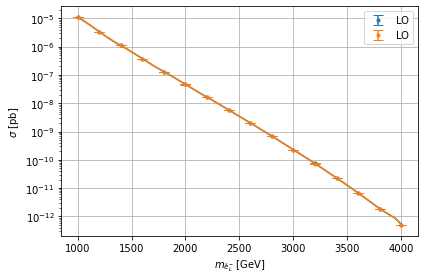

computed AUC using sklearn.metrics.auc: 13.719960482782628


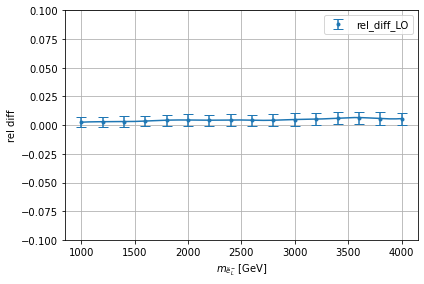

Running: 16 jobs
skipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskip./output/8bcb7398d43999d261be25d6924e6c67b32a79a855ecd867b5f29c6b5fd5ac48.out
computed AUC using sklearn.metrics.auc: 0.001952265661531226
computed AUC using sklearn.metrics.auc: 0.0019466431768724573


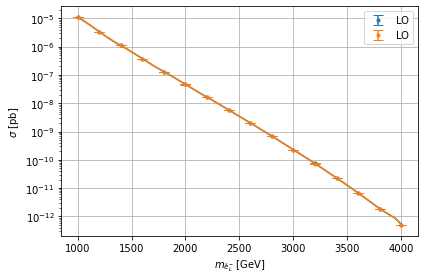

computed AUC using sklearn.metrics.auc: 13.719960482782628


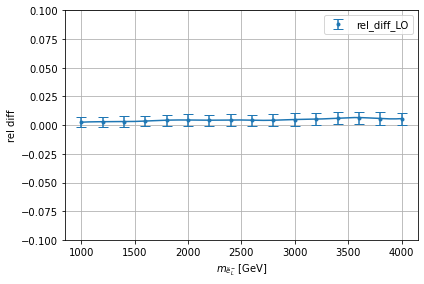

Running: 16 jobs
skipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskip./output/8338da065febd97cd011fb06ee31784892ea315354fc78df26c945ddb3dc1def.out
computed AUC using sklearn.metrics.auc: 0.0019522595901273674
computed AUC using sklearn.metrics.auc: 0.0019466431788340824


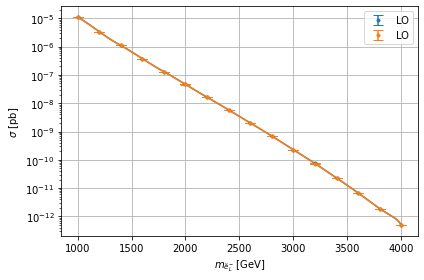

computed AUC using sklearn.metrics.auc: 13.684461741835321


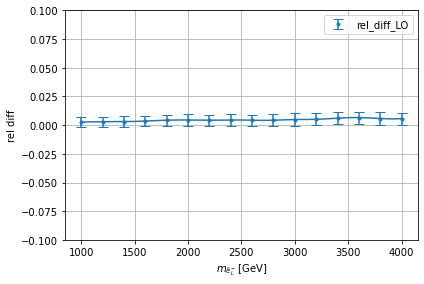

Running: 16 jobs


./output/a38b4dbf0ade9ec110737dfa17ab0a8f210e65a602a6308a6dc2bb190351e6dc.out
No module named madgraph
INFO: ************************************************************
*                                                          *
*           W E L C O M E  to  M A D G R A P H 5           *
*                       a M C @ N L O                      *
*                                                          *
*                 *                       *                *
*                   *        * *        *                  *
*                     * * * * 5 * * * *                    *
*                   *        * *        *                  *
*                 *                       *                *
*                                                          *
*         VERSION 5.2.7.3               20xx-xx-xx         *
*                                                          *
*    The MadGraph5_aMC@NLO Development Team - Find us at   *
*                 http://amcatnlo.cer

stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device


ERROR: The width of particle 21 is different of zero for a massless particle. 
ERROR: The width of particle 12 is different of zero for a massless particle. 
ERROR: The width of particle 14 is different of zero for a massless particle. 
ERROR: The width of particle 16 is different of zero for a massless particle. 
ERROR: The width of particle 11 is different of zero for a massless particle. 
ERROR: The width of particle 13 is different of zero for a massless particle. 
ERROR: The width of particle 2 is different of zero for a massless particle. 
ERROR: The width of particle 4 is different of zero for a massless particle. 
ERROR: The width of particle 1 is different of zero for a massless particle. 
ERROR: The width of particle 3 is different of zero for a massless particle. 
ERROR: The width of particle 5 is different of zero for a massless particle. 
ERROR: The width of particle 9000001 is different of zero for a massless particle. 
write ./param_card.dat
INFO: Using LHAPDF v6.3.0 int

stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input'stty: 'standard input': Inappropriate ioctl for device
: Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'sta

computed AUC using sklearn.metrics.auc: 0.0019520852633202023
computed AUC using sklearn.metrics.auc: 0.0019462224875838117


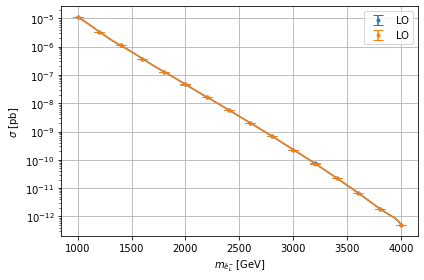

computed AUC using sklearn.metrics.auc: 13.87080280530428


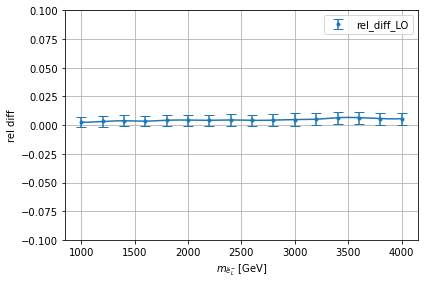

In [3]:
for pa,pb in ps:
    for param in params:
        i = hepi.Input(hepi.Order.LO,13000,pa,pb,param,"CT14lo","CT14lo",1., 1.,model_path=model_path)
        li = [i]
        li = hepi.mass_scan([i],pa, np.linspace(1000,4000,16),diff_L_R=20)
        rs_dl = rs.run(li,True,False)
        mg_dl = mg.run(li,False,False)
        rs_dl['rel_diff_LO'] = (rs_dl["LO"]-mg_dl["LO"])/rs_dl["LO"]

        hepi.mass_plot(rs_dl,"LO",pa,logy=True)
        #hepi.mass_plot(rs_dl,p,"lo",logy=True)
        hepi.mass_plot(mg_dl,"LO",pa,logy=True)
        smpl.plot.show()
        hepi.mass_plot(rs_dl,"rel_diff_LO",pa,logy=False,label="rel_diff_LO",yaxis="rel diff")
        plt.ylim([-0.1,0.1])
        smpl.plot.show()

# NLO comparison

## Scale

Running: 16 jobs


skipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskip./output/0761af8faae1ea093047e116c2728cf903fe22d5e43547c7583cc2e84743b4d9.out


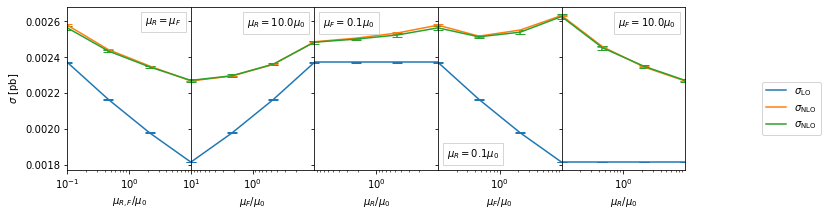

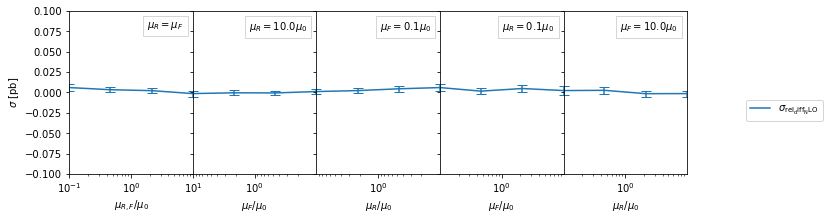

Running: 16 jobs
skipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskip./output/60fff0758ea6ec7697104ed6a87a71eb32b6de1cadd429baa1f5f2e10055a21b.out


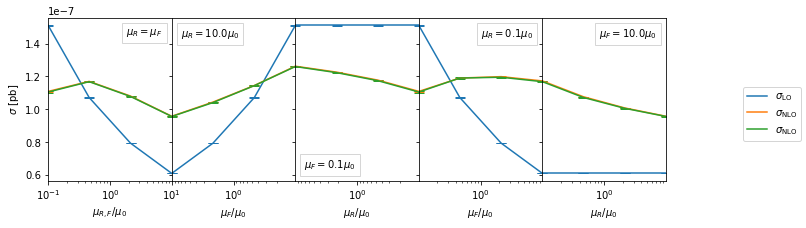

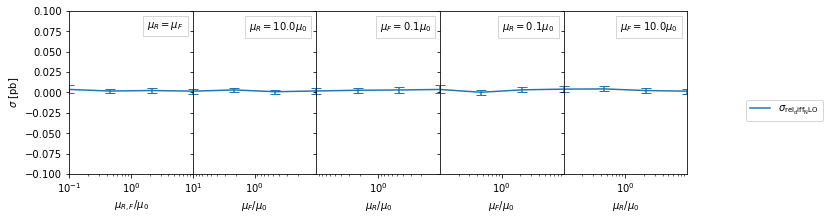

Running: 16 jobs
skipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskip./output/4cafac7deaf60f2ed9d5e90aa1d9e03a233e67a17175ab11026f2555e4eb7d50.out


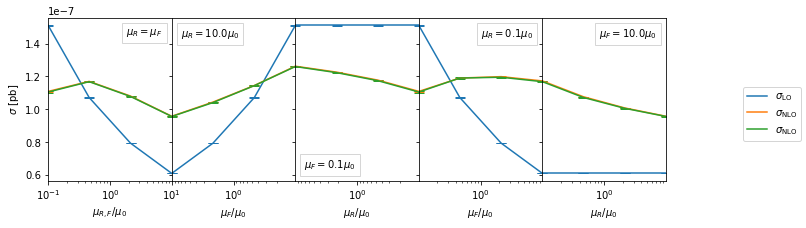

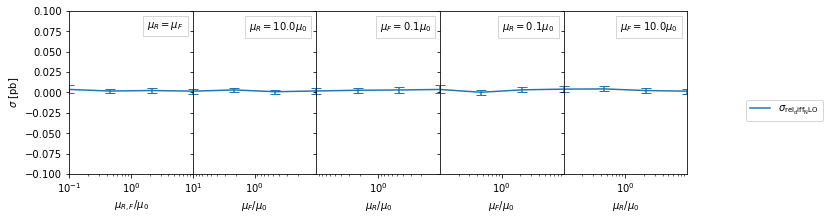

Running: 16 jobs
skipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskip./output/2369fcdba826a149dc095774acb6468d8210bea9ce4b179a075ada8752ed5fdf.out


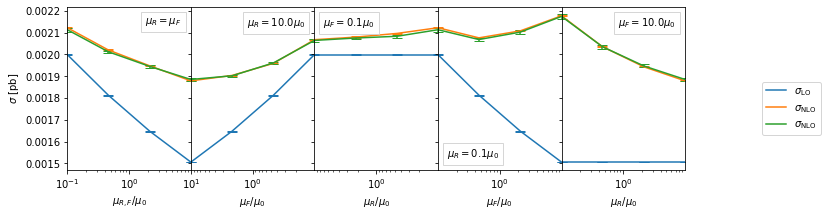

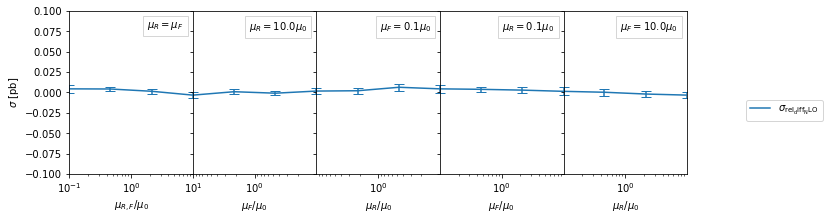

Running: 16 jobs


./output/e667e0f0dd88df605383b1689242913999b04ffc49d1a00272657df0d2e19576.out
No module named madgraph
INFO: ************************************************************
*                                                          *
*           W E L C O M E  to  M A D G R A P H 5           *
*                       a M C @ N L O                      *
*                                                          *
*                 *                       *                *
*                   *        * *        *                  *
*                     * * * * 5 * * * *                    *
*                   *        * *        *                  *
*                 *                       *                *
*                                                          *
*         VERSION 5.2.7.3               20xx-xx-xx         *
*                                                          *
*    The MadGraph5_aMC@NLO Development Team - Find us at   *
*                 http://amcatnlo.cer

stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device


write ./param_card.dat
INFO: Using LHAPDF v6.3.0 interface for PDFs 
INFO: Compiling source... 
INFO:           ...done, continuing with P* directories 
 Check the MG5_aMC option 'output_dependencies'.
 This will prevent the use of HERWIG6/Pythia6 shower. 
INFO: Compiling directories... 
INFO: Compiling on 16 cores 
INFO:  Compiling P0_uux_elmelp... 
INFO:  Compiling P0_ddx_elmelp... 
INFO:  Compiling P0_uxu_elmelp... 
INFO:  Compiling P0_dxd_elmelp... 
INFO:     P0_dxd_elmelp done. 
INFO:     P0_uxu_elmelp done. 
INFO:     P0_ddx_elmelp done. 
INFO:     P0_uux_elmelp done. 
INFO: Checking test output: 
INFO: P0_uux_elmelp 
INFO:  Result for test_ME: 
INFO:    Passed. 
INFO:  Result for check_poles: 
INFO:    Poles successfully cancel for 20 points over 20 (tolerance=1.0e-05) 
INFO: P0_ddx_elmelp 
INFO:  Result for test_ME: 
INFO:    Passed. 
INFO:  Result for check_poles: 
INFO:    Poles successfully cancel for 20 points over 20 (tolerance=1.0e-05) 
INFO: P0_uxu_elmelp 
INFO:  Result 

stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'sta

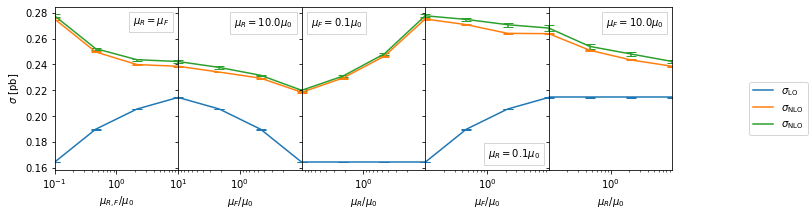

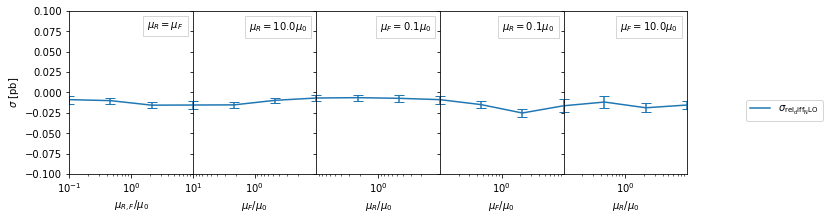

In [5]:
for pa,pb in ps:
    for param in params:
        i = hepi.Input(hepi.Order.NLO,13000,pa,pb,param,"CT14lo","CT14lo",1., 1.,model_path=model_path)
        li = [i]
        li = hepi.scan(li,"mu_f",np.around(np.logspace(-1, 1, 4),2))
        li = hepi.scan(li,"mu_r",np.around(np.logspace(-1, 1, 4),2))
        rs_dl = rs.run(li,True,False)
        mg_dl = mg.run(li,False,False)
        rs_dl['rel_diff_NLO'] = (rs_dl["NLO"]-mg_dl["NLO"])/rs_dl["NLO"]
        hepi.scale_plot(rs_dl,["LO","NLO"],cont=False)
        hepi.scale_plot(mg_dl,["NLO"],cont=True)
        smpl.plot.show()
        hepi.scale_plot(rs_dl,["rel_diff_NLO"],cont=False)
        plt.ylim([-0.1,0.1])
        smpl.plot.show()

## Mass

Running: 16 jobs


skipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskip./output/365fb09f96e9edc15f3d33df9cf23c628e1e3ef165925d5358e8272ca57e56fa.out
computed AUC using sklearn.metrics.auc: 0.001952055109280725
computed AUC using sklearn.metrics.auc: 0.0022477410112825137
computed AUC using sklearn.metrics.auc: 0.002242766763038726


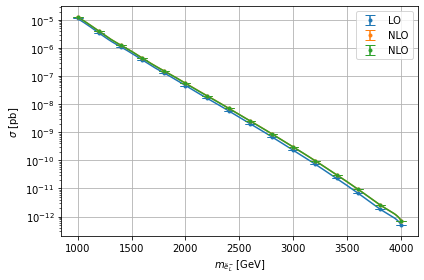

computed AUC using sklearn.metrics.auc: 9.082784416248892


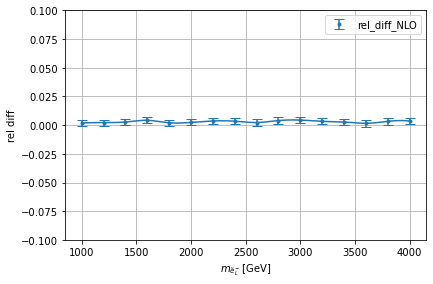

Running: 16 jobs
skipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskip./output/6762eb8b8d9ebfa3cc152f1094d42ad22ff1b1c891aa38aa139d2bc8bfeca115.out
computed AUC using sklearn.metrics.auc: 0.001952265661531226
computed AUC using sklearn.metrics.auc: 0.00231188153856409
computed AUC using sklearn.metrics.auc: 0.002307955545336782


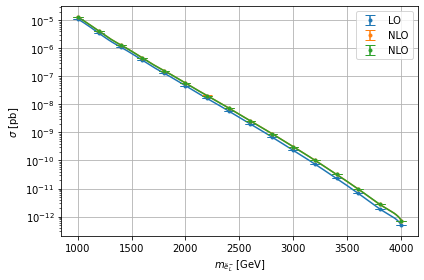

computed AUC using sklearn.metrics.auc: 7.487719886202699


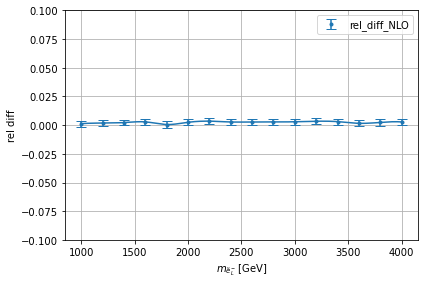

Running: 16 jobs
skipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskip./output/d93e9736a484f7c5e751a950c34fb5571619009b0d11e4aea48feb242602649a.out
computed AUC using sklearn.metrics.auc: 0.001952265661531226
computed AUC using sklearn.metrics.auc: 0.00231188153856409
computed AUC using sklearn.metrics.auc: 0.002307955545336782


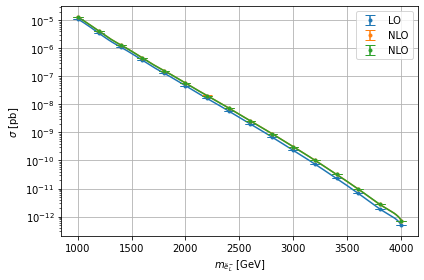

computed AUC using sklearn.metrics.auc: 7.487719886202699


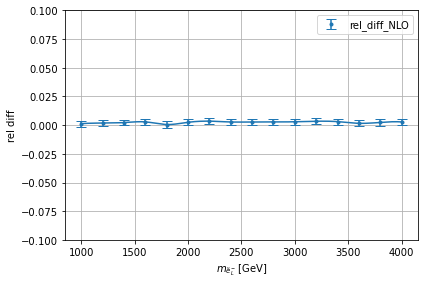

Running: 16 jobs
skipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskip./output/f1550e289db7ecdecc41f22773b845db46bb2b5e7e3de9e098b9702ca7c46fbc.out
computed AUC using sklearn.metrics.auc: 0.0019522595901273674
computed AUC using sklearn.metrics.auc: 0.0022921768748040095
computed AUC using sklearn.metrics.auc: 0.0022885381125661297


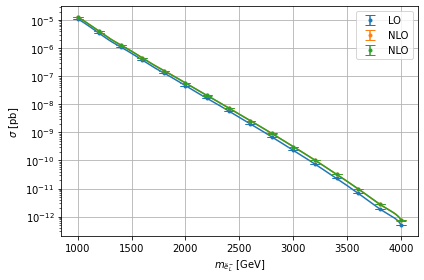

computed AUC using sklearn.metrics.auc: 7.503871225246383


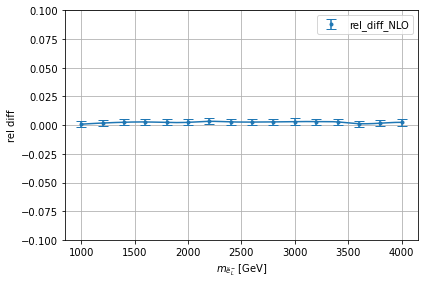

Running: 16 jobs


./output/72987b3d7b839e6f7c296753b872340316ffd66965cb5b2910f47def50804159.out
No module named madgraph
INFO: ************************************************************
*                                                          *
*           W E L C O M E  to  M A D G R A P H 5           *
*                       a M C @ N L O                      *
*                                                          *
*                 *                       *                *
*                   *        * *        *                  *
*                     * * * * 5 * * * *                    *
*                   *        * *        *                  *
*                 *                       *                *
*                                                          *
*         VERSION 5.2.7.3               20xx-xx-xx         *
*                                                          *
*    The MadGraph5_aMC@NLO Development Team - Find us at   *
*                 http://amcatnlo.cer

stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device


ERROR: The width of particle 21 is different of zero for a massless particle. 
ERROR: The width of particle 12 is different of zero for a massless particle. 
ERROR: The width of particle 14 is different of zero for a massless particle. 
ERROR: The width of particle 16 is different of zero for a massless particle. 
ERROR: The width of particle 11 is different of zero for a massless particle. 
ERROR: The width of particle 13 is different of zero for a massless particle. 
ERROR: The width of particle 2 is different of zero for a massless particle. 
ERROR: The width of particle 4 is different of zero for a massless particle. 
ERROR: The width of particle 1 is different of zero for a massless particle. 
ERROR: The width of particle 3 is different of zero for a massless particle. 
ERROR: The width of particle 5 is different of zero for a massless particle. 
ERROR: The width of particle 9000001 is different of zero for a massless particle. 
write ./param_card.dat
INFO: Using LHAPDF v6.3.0 int

stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: stty: 'standard input'stty: 'standard input': Inappropriate ioctl for device
: Inappropriate ioctl for device
'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'sta

computed AUC using sklearn.metrics.auc: 0.0019520852633202023
computed AUC using sklearn.metrics.auc: 0.0022899664194779286
computed AUC using sklearn.metrics.auc: 0.002150718767961682


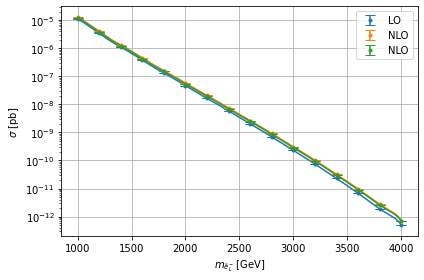

computed AUC using sklearn.metrics.auc: 201.1821571434006


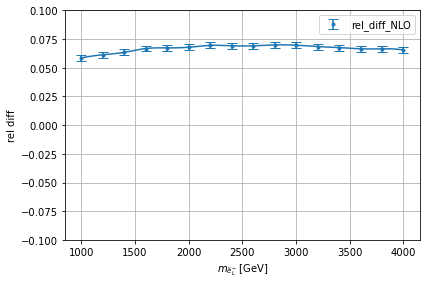

In [6]:
for pa,pb in ps:
    for param in params:
        i = hepi.Input(hepi.Order.NLO,13000,pa,pb,param,"CT14lo","CT14lo",1., 1.,model_path=model_path)
        li = [i]
        li = hepi.mass_scan([i],pa, np.linspace(1000,4000,16),diff_L_R=20)
        rs_dl = rs.run(li,True,False)
        mg_dl = mg.run(li,False,False)
        rs_dl['rel_diff_NLO'] = (rs_dl["NLO"]-mg_dl["NLO"])/rs_dl["NLO"]

        hepi.mass_plot(rs_dl,"LO",pa,logy=True)
        hepi.mass_plot(rs_dl,"NLO",pa,logy=True)
        hepi.mass_plot(mg_dl,"NLO",pa,logy=True)
        smpl.plot.show()
        hepi.mass_plot(rs_dl,"rel_diff_NLO",pa,logy=False,label="rel_diff_NLO",yaxis="rel diff")
        plt.ylim([-0.1,0.1])
        smpl.plot.show()